In [1]:
# load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
map_quest = pd.read_csv("/content/drive/My Drive/map_quest.csv")

In [3]:
# split X, y
X = map_quest.drop('Severity', axis=1)
y= map_quest['Severity']

In [4]:
X.isnull().values.any()

True

In [5]:
# missing value percentage calculation
missing = pd.DataFrame(map_quest.isnull().sum()).reset_index()
missing.columns = ['Labels', 'Percentage']
missing['Percentage'] = missing['Percentage'].apply(lambda x: (x/map_quest.shape[0])*100)
missing.loc[missing['Percentage'] > 0, :].sort_values(by=['Percentage'], ascending=False)

,Labels,Percentage
7,Humidity(%),4.303546
8,Pressure(in),4.303546
9,Visibility(mi),4.303546
10,Wind_Speed(mph),4.303546
13,County_freq,4.303546
14,Zipcode_freq,4.303546
15,Airport_Code_freq,4.303546
16,Street_freq,4.303546


In [6]:
map_quest = map_quest.dropna(subset=['Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                                    'County_freq', 'Zipcode_freq', 'Airport_Code_freq', 'Street_freq'])

In [7]:
X = map_quest.drop('Severity', axis=1)

In [8]:
y= map_quest['Severity']

In [9]:
# Standardizing the features based on unit variance
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
# split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616) 

# Logistic Regression

From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters penalty='l2', C=1 and max_iter=10000.

In [ ]:
clf = LogisticRegression(penalty='l2', C=1, max_iter=10000,random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.72607408417468
Test F_Beta:  0.7257922068517338


We see that the Logistic Regression model yeild low recall value but there is not much overfitting , which is a good sign but we will have to look for other models as well.

### Confusion Matrix

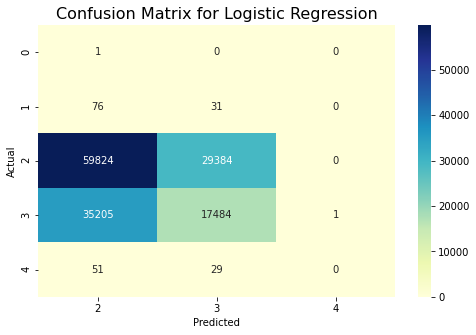

In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for Logistic Regression", fontsize=16)
plt.show()

# Decision Tree

### From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters min_samples_split=10, min_samples_leaf=2 and max_features='auto'.

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=2, max_features='auto',random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.8679385743824823
Test F_Beta:  0.7408860688831596


Although this model has good recall value on training data, we see that there is a clear sign of overfitting, therefore this model is not usable.

### Confusion Matrix

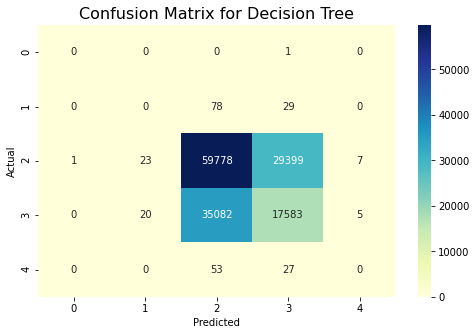

In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for Decision Tree", fontsize=16)
plt.show()

# Random Forest Classifier

### From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters n_estimators=160, min_samples_split=5, min_samples_leaf=2 and max_features='auto'.

In [ ]:
clf = RandomForestClassifier(n_estimators=160, min_samples_split=5, min_samples_leaf=2, max_features='auto',random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.9639100286543165
Test F_Beta:  0.8244100138342509


This model again has an overfitting problem. Therefore, we won't move forward with this model.

### Confusion Matrix

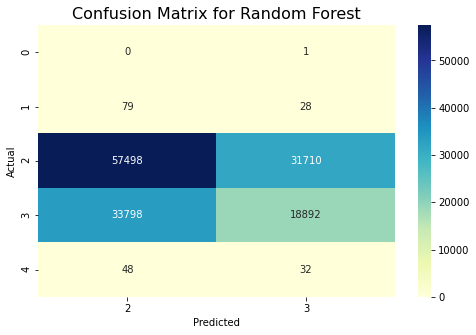

In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for Random Forest", fontsize=16)
plt.show()

# AdaBoost Classifier

### From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters n_estimators=80, algorithm='SAMME.R'.

In [ ]:
clf = AdaBoostClassifier(n_estimators=80, algorithm='SAMME.R',random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.681549970431043
Test F_Beta:  0.6806269256659433


This model doesn't have much overfitting but the recall value is even lesser than Logistic Regrssion. So, we will let go of this model.

### Confusion Matrix

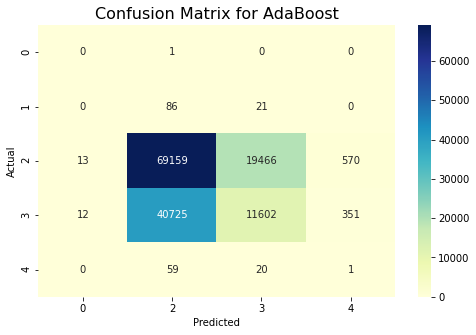

In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for AdaBoost", fontsize=16)
plt.show()

# Gradient Boosting Classifier

From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features='auto'.

In [ ]:
clf = GradientBoostingClassifier(n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features='auto', random_state=60616)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.7634182882030935
Test F_Beta:  0.7627053536640327


This has by far the best recall value, not a great one, but better than most of all since it has the maximum value along with very less overfitting.

### Confusion Matrix

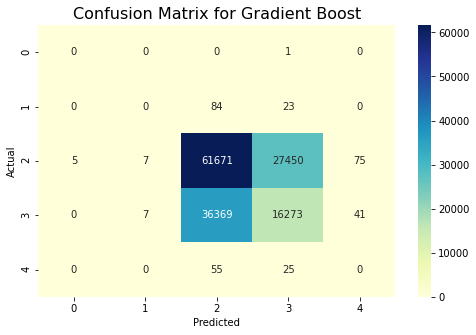

In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for Gradient Boost", fontsize=16)
plt.show()

# XG Boost Classifier

From hyperparameter tuning file, we see that we get the best result when we take the hyperparamters learning_rate=0.9, gamma=0.25, max_depth=10, min_child_weight=5, reg_lambda=1, reg_alpha=0.75.

In [11]:
clf = XGBClassifier(learning_rate=0.9, gamma=0.25, max_depth=10, min_child_weight=5,
                    reg_lambda=1, reg_alpha=0.75)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
fbeta_train = fbeta_score(y_train, y_pred_train, beta=0.5, average='weighted')
print("Train F_Beta: ", (fbeta_train))
y_pred_test = clf.predict(X_test)
fbeta_test = fbeta_score(y_test, y_pred_test, beta=0.5, average='weighted')
print("Test F_Beta: ", (fbeta_test))

Train F_Beta:  0.9448127528045372
Test F_Beta:  0.9155091950826506


This is the best model I have got and this is usable since the overfitting is not too much. This is the model which will be deployed.

### Confusion Matrix

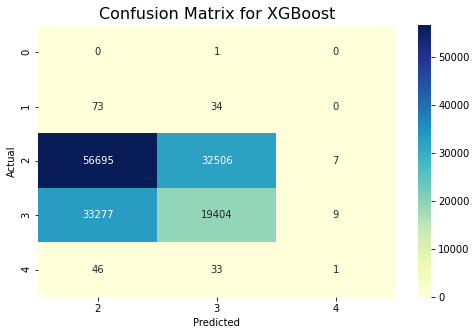

In [12]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred_test, name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix for XGBoost", fontsize=16)
plt.show()

# Save Model

In [13]:
model = pickle.dump(clf, open('model.pkl','wb'))